<a href="https://colab.research.google.com/github/ba88052/Core_Footprint/blob/main/core_footprint_analize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import 套件與函數

In [ ]:
#import常用套件與版本
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy
import sklearn
import requests
import re
from sklearn.model_selection import cross_val_score
import wordcloud
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
import jieba

def count_word_num(df, column):
    words = []
    words = df[column].apply(lambda x: list(jieba.cut(str(x), HMM=True)))
    chi_stopword = ['!',',','.','?','-s','-ly','>','<','</s>','s', '-', "+", "_", "-", "[","]", "/", "(", ")", "*", "–", " ", "＊", "【" , "】", "（", "）"]
    words = words.apply(lambda x: [word for word in x if word not in chi_stopword])
    word_count = {}
    for line in words:
        for word in line:
            if word in word_count :
                word_count[word] = word_count[word]+1
            else:
                word_count[word] = 1
    return word_count

!wget https://github.com/odek53r/Data-Science-Camp/raw/main/SourceHanSerifK-Light.otf
def make_wordcloud_dict(dic, name="NO"):
    wordcloud = WordCloud(
            background_color = 'black',
            font_path = './SourceHanSerifK-Light.otf', # 放入中文字型檔路徑
            colormap="tab20c",
            width = 1600,
            height = 800,
            margin = 2)
    # wordcloud 套件 Input 需放入詞頻統計的 dict 型態變數
    wordcloud = wordcloud.generate_from_frequencies(dic) 
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    if name != "NO":
        plt.savefig(name)    
    plt.show()
    

def df_for_model(df):
    # df["avg_price"] = (df["item_min_price"]+df["item_max_price"])/2
    if "target" in list(df.columns):
        df = df[["store_name", "item_name", "avg_price",  "target"]]
    else:
        df = df[["store_name", "item_name", "avg_price"]]
    # store = []
    # for i in df["store_name"].tolist():
    #     company = re.sub(r"有限公司.*$", "",str(i))
    #     company = re.sub(r"股份.*$", "",company)
    #     store.append(company)
    # df["store_name"] = store
    
    test_count = count_word_num(df, "item_name")
    test_items = list(test_count.keys())
    for item in test_items:
        df[item] = 0
    df = df.set_index("item_name")
    for l in df.index[:]:
        for i in df.columns[4:]:
            if i in l:
                df.loc[l, i] = 1
    df = pd.get_dummies(df, columns = ["store_name"], drop_first=True)   
    return df

def search_for(product_name, dataframe):
    product_re = re.compile(fr"{product_name}")
    ans_df = dataframe[[l != None for l in [product_re.search(i) for i in dataframe["item_name"]]]]
    return ans_df

def DropboxLink(did, fname):
    return 'https://dl.dropboxusercontent.com/s/%s/%s' % \
    (did, fname)

def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath


def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

--2022-09-19 04:17:35--  https://github.com/odek53r/Data-Science-Camp/raw/main/SourceHanSerifK-Light.otf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/odek53r/Data-Science-Camp/main/SourceHanSerifK-Light.otf [following]
--2022-09-19 04:17:35--  https://raw.githubusercontent.com/odek53r/Data-Science-Camp/main/SourceHanSerifK-Light.otf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23420516 (22M) [application/octet-stream]
Saving to: ‘SourceHanSerifK-Light.otf.2’

SourceHanSerifK-Lig 100%[===================>]  22.33M   108MB/s    in 0.2s    

2022-09-19 04:17:35 (108 MB/s) - ‘SourceHanSerifK-L

#下載檔案

In [ ]:
#下載檔案
fetch_file_via_requests(
    DropboxLink('s75dsvuik431cpu', 'file_62c39f3f7428b.csv'), "")

'file_62c39f3f7428b.csv'

#載入檔案

In [ ]:
df = pd.read_csv('file_62c39f3f7428b.csv')
df = df[df["item_min_price"] > 0]

In [ ]:
df["avg_price"] = (df["item_min_price"]+df["item_max_price"])/2
df = df[["store_name", "item_name", "avg_price", "item_buy_frq"]]
store = []
for i in df["store_name"].tolist():
    company = re.sub(r"有限公司.*$", "",str(i))
    company = re.sub(r"股份.*$", "",company)
    store.append(company)
df["store_name"] = store

KeyError: ignored

In [ ]:
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df = df[df["avg_price"] > 0]
df.groupby("store_name").sum().sort_values(by = "item_buy_frq", ascending = False)[0:10]

,avg_price,item_buy_frq
store_name,,
統一超商,1.176479e+06,15013.25
全聯實業,1.570565e+06,14485.97
家福,2.119295e+06,13695.21
富邦媒體科技,1.038482e+07,9740.11
全家便利商店,6.658057e+05,9561.32
大潤發流通事業,9.246705e+05,8529.50
寶雅國際,8.908213e+05,7751.91
新加坡商蝦皮娛樂電商,2.475879e+06,7164.04
惠康百貨,4.215262e+05,6471.76


In [ ]:
tea_product_7_11 = tea_df[tea_df["store_name"] == "統一超商"]
# tea_product_7_11 = search_for("王", tea_product_7_11)
tea_product_7_11 = search_for("綠茶", tea_product_7_11)
tea_product_7_11.sort_values(by = "item_buy_frq", ascending = False)

,store_name,item_name,avg_price,item_buy_frq,target
25669,統一超商,(區)每朝健康綠茶PET650(四入),140.0,14.67,2
9097,統一超商,*純喫茶無糖綠茶650ml(盒),25.0,12.88,2
44823,統一超商,*純喫茶綠茶481ml(盒),20.0,8.10,2
3213,統一超商,(A)*純喫茶綠茶650ml(盒),25.0,7.90,2
15561,統一超商,茶裏王日式綠茶PET1250,38.0,6.67,2
...,...,...,...,...,...
16305,統一超商,(區)悅氏梅子綠茶2L,50.0,1.00,2
5750,統一超商,振-活益比菲多-綠茶多酚340ml,30.0,1.00,2
324487,統一超商,(選)悅氏礦泉綠茶PET2000,50.0,1.00,2
13292,統一超商,慶-台灣農林青碧茉香綠茶TR650ml,30.0,1.00,2


In [ ]:
seven_eleven = df[df["store_name"] == "統一超商"]
search_for("可口可樂", seven_eleven)

,store_name,item_name,avg_price,item_buy_frq
103,統一超商,可口可樂PET920,39.0,2.59
501,統一超商,可口可樂 PET 435ml,25.0,2.06
5567,統一超商,*可口可樂PET600.,29.0,2.09
8569,統一超商,可口可樂ZERO-PET600.,30.5,3.22
8628,統一超商,(E)可口可樂橘子口味PET600,29.0,1.19
15269,統一超商,可口可樂PET2000,50.0,1.71
15609,統一超商,(A)*可口可樂PET600,29.0,2.40
32382,統一超商,*可口可樂纖維+PET600,35.0,3.61
39912,統一超商,可口可樂易開罐235ml,15.0,3.38
84155,統一超商,可口可樂435ml,36.5,1.00


In [ ]:
search_for("紅茶", seven_eleven)

,store_name,item_name,avg_price,item_buy_frq
218,統一超商,*統一麥香紅茶TP375,15.0,3.61
527,統一超商,熱阿薩姆紅茶拿鐵(中),45.0,2.02
611,統一超商,SUAN氣泡檸檬紅茶PET540,29.0,1.90
654,統一超商,*純喫茶紅茶481ml(盒),20.0,3.41
655,統一超商,杜老爺x立頓水果雙Q紅茶冰棒,39.0,1.00
...,...,...,...,...
484393,統一超商,原萃冷萃蜜香紅茶450ml,96.0,1.20
484795,統一超商,(熱) 皇家伯爵紅茶拿鐵/抹茶拿鐵/巧克力可可歐蕾,165.0,1.00
539782,統一超商,純喫茶紅茶650ml,56.5,2.00
541007,統一超商,隨時取-熱皇家伯爵紅茶拿鐵,93.0,1.00


In [ ]:
product_df = df.copy()

#整理資料

In [ ]:
#可樂
notcola = ["可樂果", "可樂餅", "曼陀珠","可樂膳", "可樂味", "模","凝冰","收納","鐘","椅","巾","調酒","森永","套餐","酸爆","水瓶", "酒瓶蓋","帝王", "麥當勞",'刺繡', "USB", "可樂口味", "軟", "爆買日本", "糖", "男","女", "日文", "王可樂", "咖哩","套餐","堡","酒","可樂風味","口香糖", "可樂膳"]
notcola_list =[]
for i in notcola:
    for l in  search_for(i, df).item_name.tolist():
        notcola_list.append(l)

cola = search_for("可樂", df)
cola = cola[~cola["item_name"].isin(notcola_list)]
# cola = set(cola.item_name.tolist())

#雪碧
nosprite = []
nosprite_list = []
for i in nosprite:
    for l in  search_for(i, df).item_name.tolist():
        nosprite_list.append(l)
        
sprite = search_for("雪碧", df)
sprite = sprite[~sprite["item_name"].isin(nosprite_list)]
sprite_list = []
for i in set(sprite.item_name.tolist()):
    sprite_list.append(i)

        
#沙士
nosarsi = ["冰","沙士風味"]
nosarsi_list = []
for i in nosarsi:
    for l in  search_for(i, df).item_name.tolist():
        nosarsi_list.append(l)
sarsi = search_for("沙士", df)
sarsi = sarsi[~sarsi["item_name"].isin(nosarsi_list)]
# sarsi_list = []
for i in set(sarsi.item_name.tolist()):
#     print(i)
    sprite_list.append(i)
        
#汽水
nosoda = ["糖", "牙膏", "兒童", "冰", "杯"]
nosoda_list = []
for i in nosoda:
    for l in  search_for(i, df).item_name.tolist():
        nosoda_list.append(l)
soda = search_for("汽水", df)
soda = soda[~soda["item_name"].isin(nosoda_list)]
soda_list = []
for i in set(soda.item_name.tolist()):
#     print(i)
    soda_list.append(i)
    
cola = cola.append(soda)
cola = cola.append(sarsi)
cola = cola.append(sprite)
# #算出碳足跡
# cola["core_footprint"] = cola["avg_price"] * 0.0213625596971447
# cola_df["core_footprint"] = cola_df["avg_price"] * 0.0213625596971447
cola_df = cola.copy()
cola_df["target"] = 1

In [ ]:
#豆漿
nosoy_milk = ["土司","吐司", "機", "飯", "鍋", "花", "蛋", "蛤蜊", "茶", "貝果", "布丁"]
nosoy_milk_list = []
for i in nosoy_milk:
    for l in  search_for(i, df).item_name.tolist():
        nosoy_milk_list.append(l)
soy_milk = search_for("豆漿", df)
soy_milk = soy_milk[~soy_milk["item_name"].isin(nosoy_milk_list)]
soy_milk_list = []
for i in set(soy_milk.item_name.tolist()):
#     print(i)
    soy_milk_list.append(i)

soy_milk_df = soy_milk.copy()
soy_milk_df["target"] = 3
soy_milk_df

,store_name,item_name,avg_price,item_buy_frq,target
18,全家便利商店,光泉無加糖黑豆漿,40.0,2.02,3
101,統一超商,統一陽光無加糖黑豆漿400ml,100.5,2.43,3
113,統一超商,光泉無加糖濃豆漿375ml,88.0,4.21,3
361,統一超商,*統一陽光低糖高纖豆漿450ml(盒),20.0,4.02,3
1178,三商家購,統一陽光無加糖高纖豆漿450ml,56.5,2.72,3
...,...,...,...,...,...
572632,杏一醫療用品,(A)統一陽光無加糖高纖豆漿450ml,20.0,8.02,3
574826,蘹軒小吃店,白豆漿,18.5,1.55,3
575701,三商家購,光泉鮮豆漿400ml,10.5,1.90,3
576827,誠品生活,美麗莎耘享濃豆漿， 豆乳， 正價品,105.0,1.00,3


In [ ]:
#茶
nottea =["肉骨茶", "茶包","餅乾", "茶葉", "茶杯", "茶壺", "茶几","茶袋", "口罩","午茶", "沐浴", "沙茶", "茶碗", "皂", "洗", "瓜子", "蛋糕",
         "茶樹", "吸管", "漱口水", "麵茶", '衣', "噴霧", "筆", "巾", "冰淇", "舒肥", '香菸', "預拌粉", "Daily Boost"
         , "堡", "大福", "套餐", "滷", "麵", "牙", "護", "餅", "糕", "茶六", "茶月", "李施德霖", "羊羹", "膠囊", "蒙布朗", "Working Smart Jogger(奶茶棕-S)", 
         "茶凍", "銅鑼燒", "茶口味", "山茶花","面膜", "兒茶素","沖泡","膠囊",'慕斯',"杯子", "影眼", "眼", "指甲", "棒", "凍", "飯", "麻糬", "讀卡", "精油","酥", 
         "飯", "磚" ,"聖代", "布", "茶色", "顏料", "沖泡", "茶包", "即溶", "食品", "足", "盤", "Working Smart", "鳳茶", "袋",
         "髮", "霜", "茶漬", "具", "扇", "捲", "可麗露", "甜筒", "司", "片", "奶", "拿鐵", "豆"]
nottea_list =[]
for i in nottea:
    for l in  search_for(i, df).item_name.tolist():
        nottea_list.append(l)
tea = search_for("茶", df)
tea = tea[~tea["item_name"].isin(nottea_list)]
tea_list = []
for i in set(tea.item_name.tolist()):
    tea_list.append(i)
    
# with open('tea.txt', 'w') as tea_file:
#     for item in tea_list:
#         tea_file.write("%s\n" % item)
# file = open('tea.txt', 'r')
# # print(file.read())

tea_df = tea.copy()
tea_df["target"] = 2
tea_df

,store_name,item_name,avg_price,item_buy_frq,target
16,全家便利商店,御茶園特撰日式綠茶,22.0,1.65,2
27,歆恩商行,海岩青茶(冰)?-大,50.0,1.68,2
36,統一超商,*原萃綠茶-玉露PET580,25.0,2.85,2
97,和德昌,冰綠茶-大,42.5,1.92,2
202,宇庭餐廳,冰紅茶-大,42.5,2.95,2
...,...,...,...,...,...
585576,家福,茶裡王台綠微甜600,45.0,1.00,2
585712,就是好咖商行,R 錫蘭紅茶-大冰,40.0,2.60,2
585750,杭緹商行,老實人紅茶,17.5,1.00,2
585757,三合豐商行,熟成紅茶(大),41.5,6.68,2


In [ ]:
#非可樂非茶
not_cola_or_tea_df = pd.concat([df, tea, tea, cola ,cola, soy_milk, soy_milk]).drop_duplicates(keep = False)
not_cola_or_tea_df["target"] = 0

not_cola_or_tea_df

,store_name,item_name,avg_price,target
0,統一超商,(熱)阿華田營養麥芽牛奶飲CAN340,30.00,0
2,台灣中油,【113F 12092005】９２無鉛汽油,23.15,0
3,大苑子開發,鮮奶綠,52.50,0
5,統一超商,泰式綠咖哩飯(辣),70.00,0
7,茂興茶行,回-鮮奶綠,75.00,0
...,...,...,...,...
585800,西門町鳥人拉麵,特製辛白湯雞肉,230.00,0
585801,西門町鳥人拉麵,特製白湯雞肉,230.00,0
585802,西門町鳥人拉麵,特制糖心蛋,30.00,0
585803,西門町鳥人拉麵,唐揚炸雞,80.00,0


In [ ]:
test_not_df = not_cola_or_tea_df.sample(n=2000,random_state=12,axis=0).copy()
test_cola_df = cola_df.copy()
test_tea_df = tea_df.sample(n=1000,random_state=12,axis=0).copy()
test_soy_milk_df = soy_milk_df
test_product_df = pd.concat([test_not_df, test_cola_df, test_tea_df, test_soy_milk_df])

#測試word2vec

In [ ]:
df

,store_name,item_name,avg_price
0,統一超商,(熱)阿華田營養麥芽牛奶飲CAN340,30.00
2,台灣中油,【113F 12092005】９２無鉛汽油,23.15
3,大苑子開發,鮮奶綠,52.50
5,統一超商,泰式綠咖哩飯(辣),70.00
7,茂興茶行,回-鮮奶綠,75.00
...,...,...,...
585801,西門町鳥人拉麵,特製白湯雞肉,230.00
585802,西門町鳥人拉麵,特制糖心蛋,30.00
585803,西門町鳥人拉麵,唐揚炸雞,80.00
585804,西門町鳥人拉麵,可口可樂,62.50


In [ ]:
test_product_df.to_csv("prodct_df.csv")

In [ ]:
test_product_df = df_for_model(test_product_df)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.975 seconds.
DEBUG:jieba:Loading model cost 0.975 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


#將產品名稱切成單詞，並保留前10個單詞做為特徵

In [ ]:
words = test_product_df["item_name"].apply(lambda x: list(jieba.cut(str(x), HMM=True)))
chi_stopword = ['!',',','.','?','-s','-ly','>','<','</s>','s', '-', "+", "_", "-", "[","]", "/", "(", ")", "*", "–", " ", "＊", "【" , "】", "（", "）"]
words = words.apply(lambda x: [word for word in x if word not in chi_stopword])
words = words.reset_index(drop = True)

KeyError: ignored

In [ ]:
w = pd.DataFrame(columns = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
for i in range(len(words)):
    for l in range(len(words.loc[i])):
        w.loc[i, str(l)] = words.loc[i][l]
w = w.fillna(0)
for i in range(10, len(w.columns)):
    w = w.drop(str(i),axis = 1)

In [ ]:
test_product_df = test_product_df.reset_index(drop = True)

In [ ]:
w = w.merge(test_product_df, how='inner', left_index=True, right_index=True)

In [ ]:
# w = w.drop("item_name", axis = 1)
w.to_csv("product_test.csv")

#使用模型預測

In [ ]:
# #分出訓練集
# from sklearn.model_selection import train_test_split
# df_train = test_product_df.copy()
# X_train, X_test, y_train, y_test = train_test_split(df_train, df_train["target"].values, test_size = 0.2, random_state=0)
# X_train = X_train.drop("target", axis = 1)
# X_test = X_test.drop("target", axis = 1)

In [ ]:
#分出訓練集
from sklearn.model_selection import train_test_split
df_train = w.copy()
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train["target"].values, test_size = 0.2, random_state=0)
X_train = X_train.drop("target", axis = 1)
X_test = X_test.drop("target", axis = 1)

In [ ]:
#導入常用模型做分數比較
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

model = [LogisticRegression(), SVC(), SGDClassifier(), 
         AdaBoostClassifier(), MLPClassifier(), GradientBoostingClassifier(), 
        RandomForestClassifier(), GaussianNB(), KNeighborsClassifier(), XGBClassifier()]
name = ["LogisticRegression", "SVC", "SGDClassifier", "AdaBoostClassifier", 
        "MLPClassifier", "GradientBoostingClassifier", "RandomForestClassifier", "GaussianNB"
        , "KNeighborsClassifier", "XGBClassifier"]
score = {}

for i, l in zip(model, name):
    i.fit(X_train, y_train)
    score[l] = compute_score(i, X_train, y_train)

ValueError: ignored

In [ ]:
score

{'LogisticRegression': 0.9894042116824859,
 'SVC': 0.49501266031949687,
 'SGDClassifier': 0.6212178206754438,
 'AdaBoostClassifier': 0.8572771322067837,
 'MLPClassifier': 0.9550998488537672,
 'GradientBoostingClassifier': 0.9947025918419914,
 'RandomForestClassifier': 0.9850379809584906,
 'GaussianNB': 0.6973221358760892,
 'KNeighborsClassifier': 0.8157697522854186,
 'XGBClassifier': 0.9943905793614922}

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


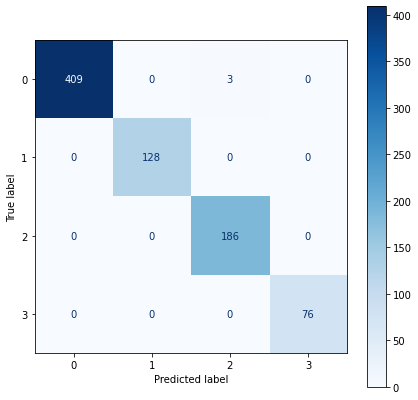

In [ ]:
#Print出模糊矩陣
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize = (7,7))
plot_confusion_matrix(XGBClassifier().fit(X_train, y_train), X_test, y_test, cmap = "Blues", ax = ax)

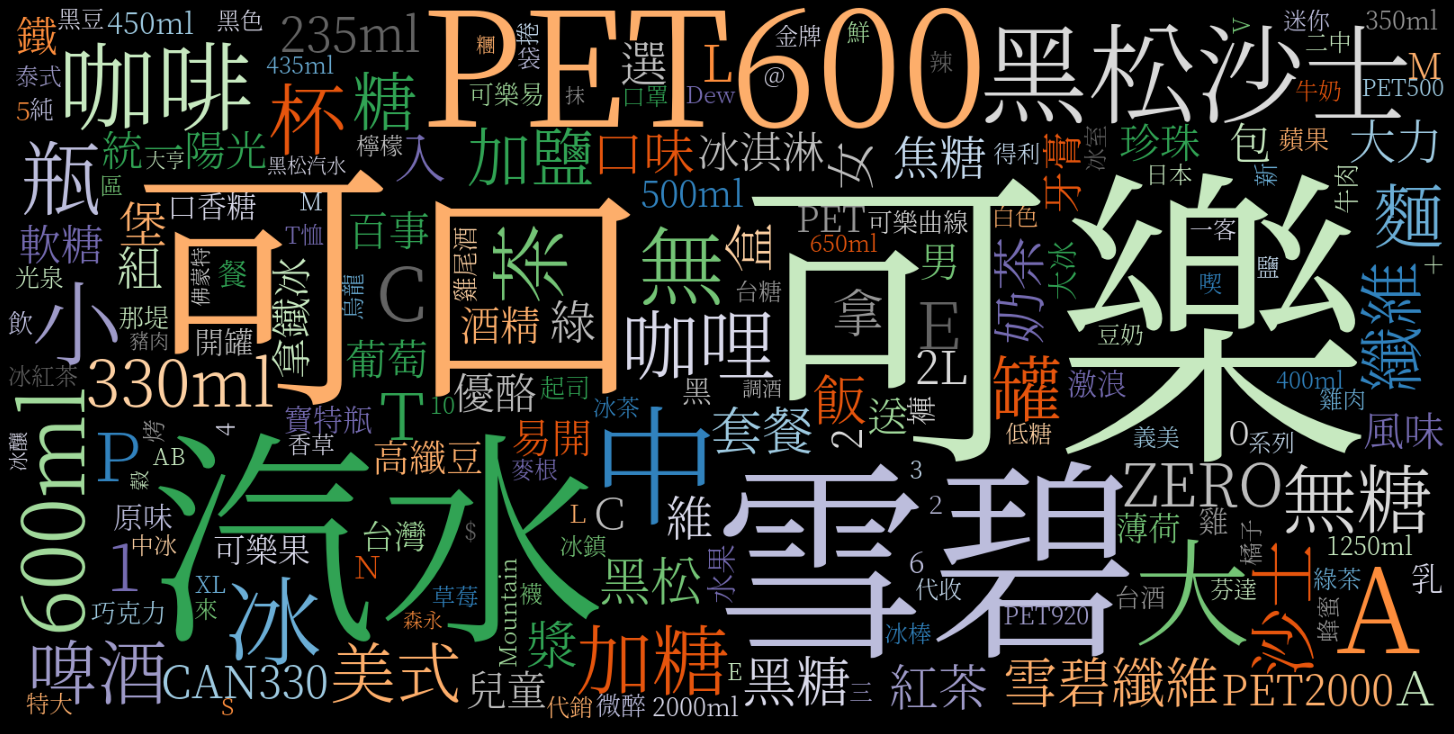

In [ ]:
#產出文字雲
cola_word_count = count_word_num(cola_df, "item_name")
make_wordcloud_dict(cola_word_count, "cola_wordcloud.png")